In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_image\MSD.png')
img.shape

(1024, 1024, 3)

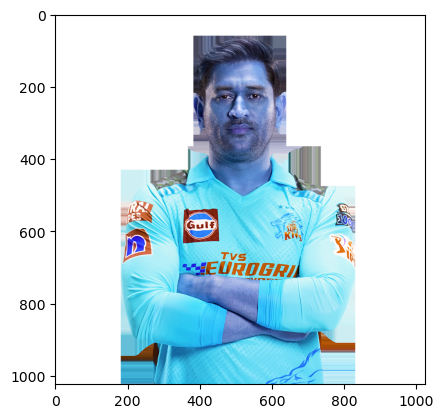

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1024, 1024)

In [5]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

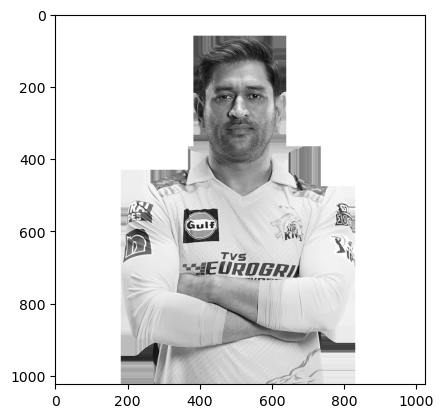

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv\haar_cascade\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv\haar_cascade\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces


array([[387, 132, 252, 252]])

In [8]:
(x,y,w,h)= faces[0]
x,y,w,h

(387, 132, 252, 252)

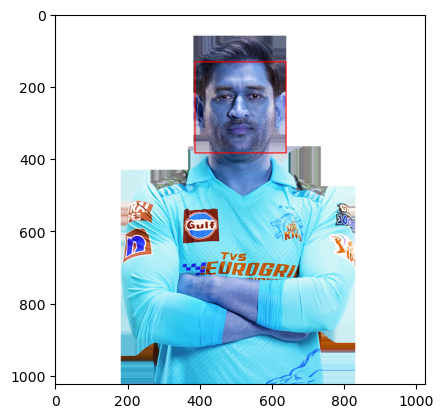

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

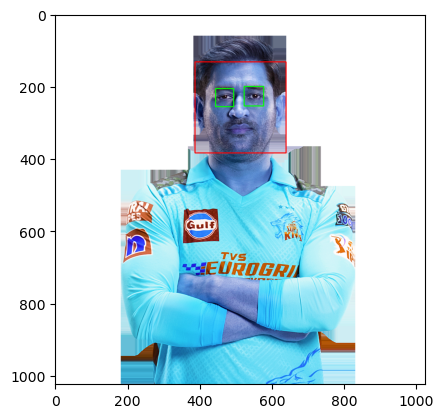

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces :
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap = 'gray')
plt.show()
    

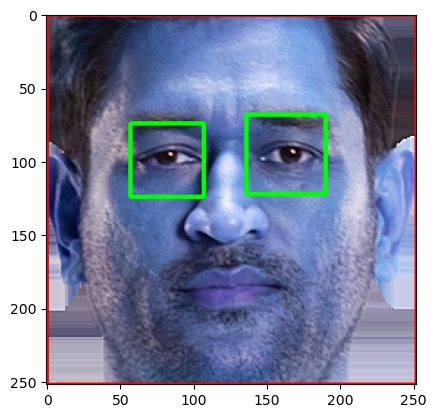

In [11]:
%matplotlib inline
plt.imshow(roi_color,cmap= 'gray')

In [12]:
def get_image_cropped_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color
              

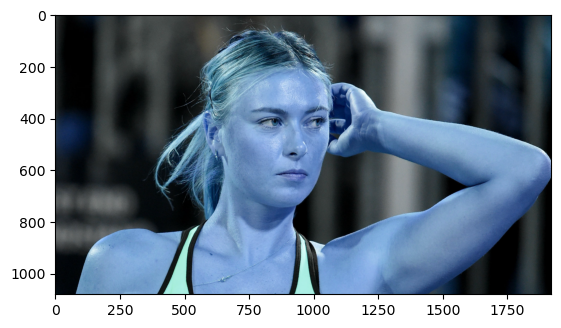

In [15]:
original_img = cv2.imread('./test_image\maria_s.jpg')
plt.imshow(original_img)

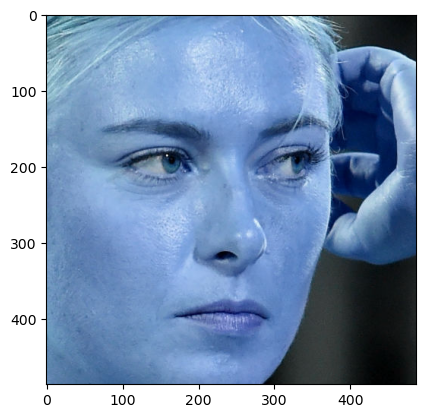

In [17]:
cropped_image = get_image_cropped_if_2_eyes('./test_image\maria_s.jpg')
plt.imshow(cropped_image)


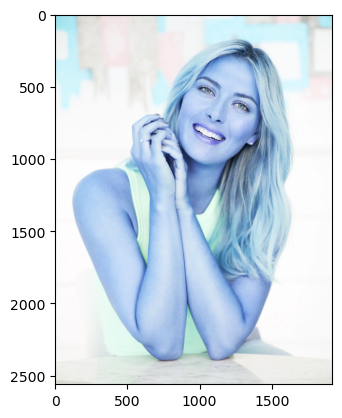

In [20]:
original_img_obstructed = cv2.imread('./test_image\maria-sharapova_r.jpg')
plt.imshow(original_img_obstructed)

In [21]:
cropped_image_obstructed = get_image_cropped_if_2_eyes('./test_image\maria-sharapova_r.jpg')
cropped_image_obstructed


In [22]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset\\cropped/"


In [23]:
import os 
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)


In [24]:
img_dirs

['./dataset/maria_sharapoa',
 './dataset/ms_dhoni',
 './dataset/pv_sindhu',
 './dataset/roger_fedrer',
 './dataset/virat_kohli']

In [25]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [28]:
import os
import cv2

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)      
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color
    #  implementation for cropping based on 2 eyes 
    

img_dirs = ["./dataset\\maria_sharapoa", "./dataset\\ms_dhoni", "./dataset\\pv_sindhu","./dataset\\roger_fedrer",
            "./dataset\\virat_kohli"]
path_to_cr_data = "./dataset\cropped"  

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []

    cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
    if not os.path.exists(cropped_folder):
        os.makedirs(cropped_folder)
        cropped_image_dirs.append(cropped_folder)
        print("Generating cropped images in folder:", cropped_folder)
    
    for count, entry in enumerate(os.scandir(img_dir), start=count):
        if entry.is_file() and entry.name.lower().endswith(('.jpg', '.jpeg', '.png')):
            roi_color = get_cropped_image_if_2_eyes(entry.path)     
            if roi_color is not None:
                cropped_file_name = f"{celebrity_name}{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)

print("Cropped image directories:", cropped_image_dirs)
print("Celebrity file names dictionary:", celebrity_file_names_dict)


maria_sharapoa
ms_dhoni
pv_sindhu
roger_fedrer
Generating cropped images in folder: ./dataset\cropped\roger_fedrer
virat_kohli
Generating cropped images in folder: ./dataset\cropped\virat_kohli
Cropped image directories: ['./dataset\\cropped\\roger_fedrer', './dataset\\cropped\\virat_kohli']
Celebrity file names dictionary: {'maria_sharapoa': ['./dataset\\cropped\\maria_sharapoa\\maria_sharapoa4.png', './dataset\\cropped\\maria_sharapoa\\maria_sharapoa5.png', './dataset\\cropped\\maria_sharapoa\\maria_sharapoa6.png', './dataset\\cropped\\maria_sharapoa\\maria_sharapoa8.png', './dataset\\cropped\\maria_sharapoa\\maria_sharapoa9.png', './dataset\\cropped\\maria_sharapoa\\maria_sharapoa10.png', './dataset\\cropped\\maria_sharapoa\\maria_sharapoa12.png', './dataset\\cropped\\maria_sharapoa\\maria_sharapoa25.png', './dataset\\cropped\\maria_sharapoa\\maria_sharapoa26.png', './dataset\\cropped\\maria_sharapoa\\maria_sharapoa29.png', './dataset\\cropped\\maria_sharapoa\\maria_sharapoa30.png',

# feature eng

In [29]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

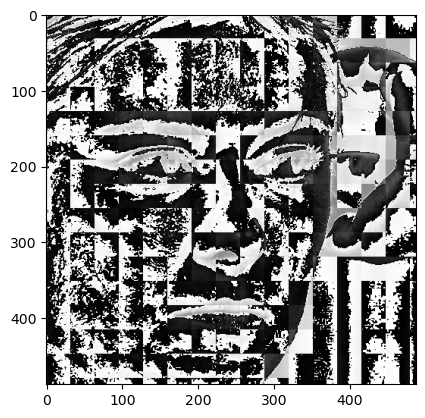

In [30]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [31]:
celebrity_file_names_dict

{'maria_sharapoa': ['./dataset\\cropped\\maria_sharapoa\\maria_sharapoa4.png',
  './dataset\\cropped\\maria_sharapoa\\maria_sharapoa5.png',
  './dataset\\cropped\\maria_sharapoa\\maria_sharapoa6.png',
  './dataset\\cropped\\maria_sharapoa\\maria_sharapoa8.png',
  './dataset\\cropped\\maria_sharapoa\\maria_sharapoa9.png',
  './dataset\\cropped\\maria_sharapoa\\maria_sharapoa10.png',
  './dataset\\cropped\\maria_sharapoa\\maria_sharapoa12.png',
  './dataset\\cropped\\maria_sharapoa\\maria_sharapoa25.png',
  './dataset\\cropped\\maria_sharapoa\\maria_sharapoa26.png',
  './dataset\\cropped\\maria_sharapoa\\maria_sharapoa29.png',
  './dataset\\cropped\\maria_sharapoa\\maria_sharapoa30.png',
  './dataset\\cropped\\maria_sharapoa\\maria_sharapoa31.png',
  './dataset\\cropped\\maria_sharapoa\\maria_sharapoa32.png',
  './dataset\\cropped\\maria_sharapoa\\maria_sharapoa33.png',
  './dataset\\cropped\\maria_sharapoa\\maria_sharapoa35.png',
  './dataset\\cropped\\maria_sharapoa\\maria_sharapoa38.p

In [41]:
class_dict = {
    "maria_sharapoa": 0,
    "ms_dhoni": 1,
    "pv_sindhu": 2,
    "roger_fedrer": 3,
    "virat_kohli": 4
}



In [43]:
import os
import cv2
import numpy as np

class_dict = {"maria_sharapoa": 0, "ms_dhoni": 1, "pv_sindhu": 2, "roger_fedrer": 3, "virat_kohli": 4}

# Your previous code...

X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])


In [45]:
len(X[0])

4096

In [46]:
32*32*3 + 32*32


4096

In [47]:
X[0]

array([[224],
       [232],
       [239],
       ...,
       [202],
       [242],
       [ 20]], dtype=uint8)

In [48]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(174, 4096)

In [49]:
X[0]

array([224., 232., 239., ..., 202., 242.,  20.])

# Model Training

In [50]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Assuming you have X and y from your previous code
# Make sure X and y are numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape the data for CNN input (assuming the images are 32x32)
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Assuming 5 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


ValueError: cannot reshape array of size 569344 into shape (32,32,3)

In [52]:
print("Before reshaping - X_train_resized shape:", X_train_resized.shape)


Before reshaping - X_train_resized shape: (139, 32, 32)


In [55]:
# Check if the channel dimension is correct now
print("After resizing - X_train_resized shape:", X_train_resized.shape)

# Reshape the data for CNN input
X_train_resized = X_train_resized.reshape(-1, common_size[0], common_size[1], 1)
X_test_resized = X_test_resized.reshape(-1, common_size[0], common_size[1], 1)


After resizing - X_train_resized shape: (139, 32, 32, 1)


In [58]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Assuming you have X and y from your previous code
# Make sure X and y are numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Resize images to a common size (e.g., 32x32)
common_size = (32, 32)
X_train_resized = np.array([cv2.resize(img, common_size) for img in X_train])
X_test_resized = np.array([cv2.resize(img, common_size) for img in X_test])

# Reshape the data for CNN input
X_train_resized = X_train_resized.reshape(-1, common_size[0], common_size[1], 1)
X_test_resized = X_test_resized.reshape(-1, common_size[0], common_size[1], 1)

# Define the CNN model
#model = Sequential()
#model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dense(5, activation='softmax'))
# (unchanged from the previous code)


# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))  # Update input_shape to (32, 32, 1)
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# (unchanged from the previous code)

# Train the model
model.fit(X_train_resized, y_train, epochs=10, validation_data=(X_test_resized, y_test))


Epoch 1/10
5/5 [==============================] - 1s 96ms/step - loss: 1.5948 - accuracy: 0.2518 - val_loss: 1.6408 - val_accuracy: 0.1714
Epoch 2/10
5/5 [==============================] - 0s 27ms/step - loss: 1.5450 - accuracy: 0.3094 - val_loss: 1.6680 - val_accuracy: 0.1714
Epoch 3/10
5/5 [==============================] - 0s 28ms/step - loss: 1.5281 - accuracy: 0.3813 - val_loss: 1.6439 - val_accuracy: 0.2000
Epoch 4/10
5/5 [==============================] - 0s 32ms/step - loss: 1.4821 - accuracy: 0.3885 - val_loss: 1.6281 - val_accuracy: 0.1714
Epoch 5/10
5/5 [==============================] - 0s 28ms/step - loss: 1.4302 - accuracy: 0.3597 - val_loss: 1.5754 - val_accuracy: 0.2286
Epoch 6/10
5/5 [==============================] - 0s 27ms/step - loss: 1.3486 - accuracy: 0.5468 - val_loss: 1.4829 - val_accuracy: 0.4571
Epoch 7/10
5/5 [==============================] - 0s 28ms/step - loss: 1.2576 - accuracy: 0.5540 - val_loss: 1.5128 - val_accuracy: 0.4000
Epoch 8/10
5/5 [===========

In [66]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assuming you have X and y from your previous code
# Make sure X and y are numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Resize images to a common size (e.g., 32x32)
common_size = (32, 32)
X_train_resized = np.array([cv2.resize(img, common_size) for img in X_train])
X_test_resized = np.array([cv2.resize(img, common_size) for img in X_test])

# Reshape the data for CNN input
X_train_resized = X_train_resized.reshape(-1, common_size[0], common_size[1], 1)
X_test_resized = X_test_resized.reshape(-1, common_size[0], common_size[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(5, activation='softmax'))

# Compile the model
optimizer = Adam(lr=0.0001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(X_train_resized, y_train, batch_size=32),
                    steps_per_epoch=len(X_train_resized) / 32,
                    epochs=50,  # You can adjust the number of epochs
                    validation_data=(X_test_resized, y_test))


Epoch 1/50
4/4 [==============================] - 2s 99ms/step - loss: 2.3788 - accuracy: 0.3381 - val_loss: 1.5633 - val_accuracy: 0.3143
Epoch 2/50
4/4 [==============================] - 0s 38ms/step - loss: 2.2316 - accuracy: 0.4317 - val_loss: 1.5805 - val_accuracy: 0.3143
Epoch 3/50
4/4 [==============================] - 0s 38ms/step - loss: 2.2281 - accuracy: 0.4532 - val_loss: 1.5702 - val_accuracy: 0.3143
Epoch 4/50
4/4 [==============================] - 0s 41ms/step - loss: 1.9843 - accuracy: 0.4892 - val_loss: 1.5602 - val_accuracy: 0.3143
Epoch 5/50
4/4 [==============================] - 0s 35ms/step - loss: 1.9919 - accuracy: 0.4748 - val_loss: 1.5513 - val_accuracy: 0.3143
Epoch 6/50
4/4 [==============================] - 0s 42ms/step - loss: 1.5035 - accuracy: 0.5755 - val_loss: 1.5483 - val_accuracy: 0.3143
Epoch 7/50
4/4 [==============================] - 0s 42ms/step - loss: 1.6220 - accuracy: 0.4964 - val_loss: 1.5539 - val_accuracy: 0.3143
Epoch 8/50
4/4 [===========

In [70]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assuming you have X and y from your previous code
# Make sure X and y are numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Resize images to a common size (e.g., 32x32)
common_size = (32, 32)
X_train_resized = np.array([cv2.resize(img, common_size) for img in X_train])
X_test_resized = np.array([cv2.resize(img, common_size) for img in X_test])

# Reshape the data for CNN input
X_train_resized = X_train_resized.reshape(-1, common_size[0], common_size[1], 1)
X_test_resized = X_test_resized.reshape(-1, common_size[0], common_size[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(5, activation='softmax'))

# Compile the model
optimizer = Adam(lr=0.0001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(X_train_resized, y_train, batch_size=32),
                    steps_per_epoch=len(X_train_resized) / 32,
                    epochs=450,  # You can adjust the number of epochs
                    validation_data=(X_test_resized, y_test))


Epoch 1/450
4/4 [==============================] - 2s 97ms/step - loss: 2.2212 - accuracy: 0.3165 - val_loss: 1.5741 - val_accuracy: 0.3143
Epoch 2/450
4/4 [==============================] - 0s 36ms/step - loss: 2.0066 - accuracy: 0.4676 - val_loss: 1.5652 - val_accuracy: 0.3143
Epoch 3/450
4/4 [==============================] - 0s 40ms/step - loss: 2.0087 - accuracy: 0.4604 - val_loss: 1.5628 - val_accuracy: 0.3143
Epoch 4/450
4/4 [==============================] - 0s 37ms/step - loss: 2.1589 - accuracy: 0.4748 - val_loss: 1.5443 - val_accuracy: 0.3143
Epoch 5/450
4/4 [==============================] - 0s 47ms/step - loss: 1.8335 - accuracy: 0.4748 - val_loss: 1.5394 - val_accuracy: 0.3143
Epoch 6/450
4/4 [==============================] - 0s 43ms/step - loss: 1.6647 - accuracy: 0.5468 - val_loss: 1.5427 - val_accuracy: 0.3143
Epoch 7/450
4/4 [==============================] - 0s 40ms/step - loss: 1.7261 - accuracy: 0.5396 - val_loss: 1.5475 - val_accuracy: 0.3143
Epoch 8/450
4/4 [===

4/4 [==============================] - 0s 34ms/step - loss: 0.4325 - accuracy: 0.8345 - val_loss: 1.7119 - val_accuracy: 0.4571
Epoch 118/450
4/4 [==============================] - 0s 29ms/step - loss: 0.3117 - accuracy: 0.8993 - val_loss: 1.7033 - val_accuracy: 0.4857
Epoch 119/450
4/4 [==============================] - 0s 29ms/step - loss: 0.3677 - accuracy: 0.8921 - val_loss: 1.7291 - val_accuracy: 0.4857
Epoch 120/450
4/4 [==============================] - 0s 29ms/step - loss: 0.3188 - accuracy: 0.8849 - val_loss: 1.7339 - val_accuracy: 0.4857
Epoch 121/450
4/4 [==============================] - 0s 29ms/step - loss: 0.3133 - accuracy: 0.9137 - val_loss: 1.7086 - val_accuracy: 0.4286
Epoch 122/450
4/4 [==============================] - 0s 30ms/step - loss: 0.3945 - accuracy: 0.8633 - val_loss: 1.7661 - val_accuracy: 0.4286
Epoch 123/450
4/4 [==============================] - 0s 37ms/step - loss: 0.3132 - accuracy: 0.8777 - val_loss: 1.8273 - val_accuracy: 0.4571
Epoch 124/450
4/4 [=

Epoch 175/450
4/4 [==============================] - 0s 31ms/step - loss: 0.3736 - accuracy: 0.8849 - val_loss: 2.9017 - val_accuracy: 0.5714
Epoch 176/450
4/4 [==============================] - 0s 33ms/step - loss: 0.2420 - accuracy: 0.9065 - val_loss: 2.8377 - val_accuracy: 0.6000
Epoch 177/450
4/4 [==============================] - 0s 33ms/step - loss: 0.2740 - accuracy: 0.8993 - val_loss: 2.9161 - val_accuracy: 0.4857
Epoch 178/450
4/4 [==============================] - 0s 34ms/step - loss: 0.2646 - accuracy: 0.8921 - val_loss: 2.9727 - val_accuracy: 0.4571
Epoch 179/450
4/4 [==============================] - 0s 33ms/step - loss: 0.2251 - accuracy: 0.9353 - val_loss: 2.7957 - val_accuracy: 0.4857
Epoch 180/450
4/4 [==============================] - 0s 34ms/step - loss: 0.2085 - accuracy: 0.9353 - val_loss: 2.7046 - val_accuracy: 0.5429
Epoch 181/450
4/4 [==============================] - 0s 30ms/step - loss: 0.2788 - accuracy: 0.9209 - val_loss: 2.7687 - val_accuracy: 0.5143
Epoch 

Epoch 233/450
4/4 [==============================] - 0s 32ms/step - loss: 0.1064 - accuracy: 0.9640 - val_loss: 2.9434 - val_accuracy: 0.5143
Epoch 234/450
4/4 [==============================] - 0s 30ms/step - loss: 0.0642 - accuracy: 0.9856 - val_loss: 2.7654 - val_accuracy: 0.5143
Epoch 235/450
4/4 [==============================] - 0s 29ms/step - loss: 0.1481 - accuracy: 0.9568 - val_loss: 2.6517 - val_accuracy: 0.5143
Epoch 236/450
4/4 [==============================] - 0s 30ms/step - loss: 0.1693 - accuracy: 0.9353 - val_loss: 2.6503 - val_accuracy: 0.5143
Epoch 237/450
4/4 [==============================] - 0s 31ms/step - loss: 0.1104 - accuracy: 0.9496 - val_loss: 2.7083 - val_accuracy: 0.5714
Epoch 238/450
4/4 [==============================] - 0s 31ms/step - loss: 0.2029 - accuracy: 0.9496 - val_loss: 2.5342 - val_accuracy: 0.5429
Epoch 239/450
4/4 [==============================] - 0s 30ms/step - loss: 0.1659 - accuracy: 0.9353 - val_loss: 2.4290 - val_accuracy: 0.5429
Epoch 

Epoch 291/450
4/4 [==============================] - 0s 29ms/step - loss: 0.1634 - accuracy: 0.9496 - val_loss: 3.0967 - val_accuracy: 0.4857
Epoch 292/450
4/4 [==============================] - 0s 33ms/step - loss: 0.1039 - accuracy: 0.9568 - val_loss: 3.3069 - val_accuracy: 0.5429
Epoch 293/450
4/4 [==============================] - 0s 32ms/step - loss: 0.1246 - accuracy: 0.9424 - val_loss: 3.4733 - val_accuracy: 0.5143
Epoch 294/450
4/4 [==============================] - 0s 29ms/step - loss: 0.1518 - accuracy: 0.9496 - val_loss: 3.3817 - val_accuracy: 0.4857
Epoch 295/450
4/4 [==============================] - 0s 29ms/step - loss: 0.0993 - accuracy: 0.9568 - val_loss: 3.5521 - val_accuracy: 0.5143
Epoch 296/450
4/4 [==============================] - 0s 31ms/step - loss: 0.2110 - accuracy: 0.9353 - val_loss: 4.0421 - val_accuracy: 0.5429
Epoch 297/450
4/4 [==============================] - 0s 30ms/step - loss: 0.1087 - accuracy: 0.9712 - val_loss: 4.6797 - val_accuracy: 0.4571
Epoch 

Epoch 349/450
4/4 [==============================] - 0s 31ms/step - loss: 0.1590 - accuracy: 0.9568 - val_loss: 3.4483 - val_accuracy: 0.4857
Epoch 350/450
4/4 [==============================] - 0s 34ms/step - loss: 0.1174 - accuracy: 0.9568 - val_loss: 3.4364 - val_accuracy: 0.5143
Epoch 351/450
4/4 [==============================] - 0s 33ms/step - loss: 0.1810 - accuracy: 0.9209 - val_loss: 3.4002 - val_accuracy: 0.5143
Epoch 352/450
4/4 [==============================] - 0s 30ms/step - loss: 0.1266 - accuracy: 0.9568 - val_loss: 3.4848 - val_accuracy: 0.5429
Epoch 353/450
4/4 [==============================] - 0s 36ms/step - loss: 0.1332 - accuracy: 0.9640 - val_loss: 3.8068 - val_accuracy: 0.5143
Epoch 354/450
4/4 [==============================] - 0s 32ms/step - loss: 0.1977 - accuracy: 0.9568 - val_loss: 4.1886 - val_accuracy: 0.4857
Epoch 355/450
4/4 [==============================] - 0s 29ms/step - loss: 0.0638 - accuracy: 0.9784 - val_loss: 4.3639 - val_accuracy: 0.4857
Epoch 

Epoch 407/450
4/4 [==============================] - 0s 29ms/step - loss: 0.3137 - accuracy: 0.9424 - val_loss: 2.8508 - val_accuracy: 0.5429
Epoch 408/450
4/4 [==============================] - 0s 32ms/step - loss: 0.0968 - accuracy: 0.9640 - val_loss: 2.6999 - val_accuracy: 0.5143
Epoch 409/450
4/4 [==============================] - 0s 29ms/step - loss: 0.0801 - accuracy: 0.9784 - val_loss: 2.7109 - val_accuracy: 0.5143
Epoch 410/450
4/4 [==============================] - 0s 35ms/step - loss: 0.1492 - accuracy: 0.9424 - val_loss: 2.8437 - val_accuracy: 0.4857
Epoch 411/450
4/4 [==============================] - 0s 29ms/step - loss: 0.2699 - accuracy: 0.9424 - val_loss: 2.8818 - val_accuracy: 0.5143
Epoch 412/450
4/4 [==============================] - 0s 32ms/step - loss: 0.1032 - accuracy: 0.9640 - val_loss: 2.9698 - val_accuracy: 0.4857
Epoch 413/450
4/4 [==============================] - 0s 31ms/step - loss: 0.0535 - accuracy: 0.9784 - val_loss: 3.0781 - val_accuracy: 0.4857
Epoch 

In [74]:

import joblib 
# Save the model as a pickle in a file 
joblib.dump(model,'saved_model.pkl') 

['saved_model.pkl']

In [75]:
class_dict = {
    "maria_sharapoa": 0,
    "ms_dhoni": 1,
    "pv_sindhu": 2,
    "roger_fedrer": 3,
    "virat_kohli": 4
}


In [76]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))